In [1]:
#[코드 6-1] 전처리에 필요한 라이브러리 설치코드
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,175 kB]
Get:14 http://security.ubun

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'python-dev' has no installation candidate


In [3]:
#[코드 6-2] 형태소분석기에 수강료 단어 추가하는 코드

import os
import sys
import shutil

def new_word_add(word):
  path = '/usr/local/lib/python'+str(sys.version[:4])+'/dist-packages/konlpy/java'
  os.chdir(path)
  os.getcwd()
  os.makedirs('./modify')
  os.chdir(path+'/modify')
  !jar xvf ../open-korean-text-2.1.0.jar
  with open(path +'/modify/org/openkoreantext/processor/util/noun/names.txt') as f:
    data = f.read()
    data += word+'\n'
  with open(path + '/modify/org/openkoreantext/processor/util/noun/names.txt', 'w') as f:
    f.write(data)
  with open(path + '/modify/org/openkoreantext/processor/util/noun/names.txt') as f:
    data = f.read()
  !jar cvf open-korean-text-2.1.0.jar org
  shutil.copy(path+'/modify/open-korean-text-2.1.0.jar', path+'/open-korean-text-2.1.0.jar')
  shutil.rmtree(path+'/modify')

new_word_add('수강료')

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

#공공체육시설 리뷰데이터의 주요키워드 분석

In [1]:
#[코드 6-3] 실습자료 불러오기 코드
import pandas as pd

data_apply = pd.read_excel("Public_sports_data.xlsx",sheet_name = 'apply_data')
contents = data_apply["리뷰"]
contents


,리뷰
0,다음날이 휴일이라 그래도 주차가 수월 했어요~\n주차장만 좀 확장되면 좋겠어요~~\...
1,월수금 파워아쿠아로빅을 다녀요~\n강사님 너무 열심히 해주시고 너무 즐거운 시간이예...
2,아쿠아로빅 만1년 했어요~\n강사님 넘 열심히시고 건강해지고 있어요~\n시설도 점점...
3,자유수영 3처넌 수영강습 49500원. 자유수영좀 늘려줬음 좋겠다 강습 하려면 새...
4,처음방문해봤는데 깔끔하게잘되어있네요 거리만좀가까웠으면자주올수있을텐데 아쉽네요시설이 ...
...,...
3159,수영- 수영선생님은 한 분....언제까지???\n물은 다시 똥물... 앞이 안 보임
3160,들어가기 힘들어 기존회원 접수를 놓치면\n정말 자신을 자책하기 쉽다\n그만큼 인기가 많다
3161,스크린골프연습하는 스포츠시설\n주차장도 넓고 저렴한금액으로 좋은시설이용하니 너무 좋아요
3162,필라테스 수업 너무 좋아요 퀄리티 높은 수업을 저렴한 가격에 받는 건 행운입니다^^


In [2]:
#[코드 6-4] 텍스트 전처리 코드
from konlpy.tag import Okt
import pandas as pd

t = Okt()
stopword = ['등등','건지다','것임','되어다','자다','넘다','가다','아주','리뷰','하다','되다','들다']
pos = lambda d: ['/'.join(p[:-1]) for p in t.pos(d, stem=True, norm=True) if ((p[1]=='Noun') |(p[1]=='Verb')|(p[1]=='Adjetive')) & (p[0] not in stopword)]
total_texts_ko = []
for doc in contents:
  a = pos(doc)
  filtered_list = [word for word in a if len(word) > 1]
  total_texts_ko.append(filtered_list)
print(total_texts_ko)


[['다음', '휴일', '주차', '주차장', '확장', '진짜', '운동'], ['수금', '파워', '아쿠아', '로빅', '다니다', '강사', '해주시', '시간', '주차장', '확장'], ['아쿠아', '로빅', '강사', '시설', '점점', '좋아지다', '주차장', '늘리다'], ['자유', '수영', '처넌', '수영', '강습', '자유', '수영', '늘리다', '주다', '강습', '새벽', '오픈', '뛰다', '가능'], ['처음', '방문', '해봤다', '거리', '자주', '오다', '시설'], ['일요일', '자유', '수영', '일요일', '영등포', '수영장', '번갈아', '시설', '레인', '개다'], ['처음', '물위', '흔들다', '흔들다', '점점', '보드', '전부', '묶다', '다른사람', '흔들리다', '흔들리다'], ['굳이', '멀리', '갈다', '정도', '아이', '시설', '프로그램', '서초', '구민'], ['이전다음', '아이', '수영', '여기', '버스', '가면', '길이', '여기', '다행'], ['주차', '돼다', '차량', '두다', '조금', '걸다', '올라가다', '걷기', '시설', '배드민턴', '오다'], ['수영', '다니다', '등록', '계속', '다니다', '이번', '달도', '운동', '해보다'], ['살이', '찌다', '산소', '근력', '운동', '이상', '나가야', '본전', '나가다', '보다'], ['붐비다', '않다', '주차장', '협소하', '도로', '주차', '바로', '딱지', '끊다', '매일', '고지서', '날아오다'], ['방문', '직원', '시설', '생기다', '얼마', '않다', '주차장', '협소해'], ['수영장', '일일', '입장', '주말', '타이밍', '재다', '오전', '사람', '강습', '시간', '부모님', '보다'], ['강사', '가르치다', '시설', '화장실', '탈의실', '바

In [3]:
#[코드 6-5] TF와 TF-IDF 산출코드
import nltk
from gensim import corpora, models

#TF 산출하는 코드
word = [text for texts in total_texts_ko for text in texts] #하나의 리스트에 넣기##
text = nltk.Text(word)
print(len(text.tokens)) # 문서에서 나온 단어수
print(len(set(text.tokens))) # 겹치지 않는 단어수
print(text.vocab().most_common(20)) # 가장 빈번히 나온 token 나열
df = pd.DataFrame()
keys, values = zip(*[(key, value) for key, value in text.vocab().items()])
df["단어"] = keys
df["빈도수"] = values
df.to_excel("TF.xlsx")

#TF-IDF 산출하는 코드
dictionary_ko = corpora.Dictionary(total_texts_ko)
tf_ko = [dictionary_ko.doc2bow(text) for text in total_texts_ko]  #tf방법으로 데이터 정형화한 코드
tfidf_model = models.TfidfModel(tf_ko)
tfidf_corpus = tfidf_model[tf_ko]  #tf-idf방법으로 데이터 정형화한 코드
tfidf_list = []
for doc in tfidf_corpus:
  tfidf_dict = {dictionary_ko[word_id]: tfidf_value for word_id, tfidf_value in doc}
  tfidf_list.append(tfidf_dict)

df = pd.DataFrame(tfidf_list)
key, value = zip(*[(a, round(df[a].sum(), 5)) for a in df.columns.tolist()])
df = pd.DataFrame()
df["단어"] = key
df["tf-idf"] = value
df.to_excel('tfidf.xlsx', index=False)

17179
2534
[('수영', 707), ('시설', 682), ('운동', 495), ('수영장', 318), ('가격', 312), ('이용', 253), ('자유', 244), ('강사', 206), ('선생님', 194), ('체육', 181), ('직원', 177), ('사람', 176), ('다니다', 173), ('센터', 165), ('프로그램', 151), ('관리', 141), ('수업', 139), ('등록', 138), ('않다', 137), ('가르치다', 133)]


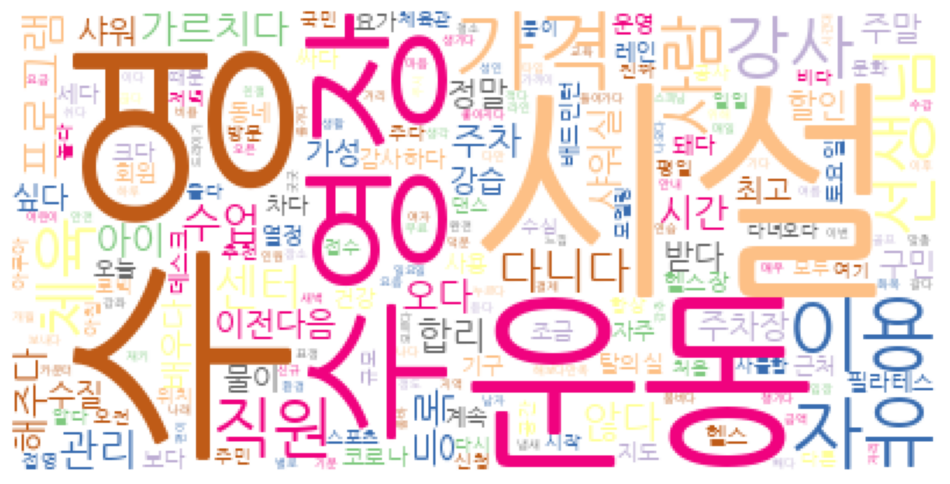

In [4]:
#[코드 6-6] 워드클라우드 시각화 코드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = text.vocab().most_common(200)
tmp_data = dict(data)
wordcloud = WordCloud(font_path='/user/share/fonts/truetype/nanum/NanumGothic.ttf',colormap = 'Accent',background_color='white').generate_from_frequencies(tmp_data)
plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(wordcloud)

#공공체육시설 리뷰 데이터의 감성분석

In [5]:
#[코드 6-7] 데이터 불러오기와 텍스트 전처리 코드
import pandas as pd
from konlpy.tag import Okt

data_model = pd.read_excel("Public_sports_data.xlsx")
contents = data_model["리뷰"]

t = Okt()
stopword = ['등등','건지다','것임','되어다','자다','넘다','가다','아주','리뷰','하다','되다','들다']
pos = lambda d: ['/'.join(p[:-1]) for p in t.pos(d, stem=True, norm=True) if ((p[1]=='Noun') |(p[1]=='Verb')|(p[1]=='Adjetive')) & (p[0] not in stopword)]
texts_ko = []
for doc in contents:
  a = pos(doc)
  filtered_list = [word for word in a if len(word) > 1]
  texts_ko.append(filtered_list)
print(texts_ko)

[['애용', '체육', '세다', '가격', '여러', '운동', '보다', '달다', '내부', '공사', '예전', '지다'], ['마스터즈', '강사', '자세', '교정', '주시', '수영', '동대문', '구민', '체육', '센터', '쭈욱'], ['매우', '않다', '인원', '유아', '다만', '남자', '아이', '대형', '튜브', '점령', '이용'], ['가지', '말다', '강사', '늦다', '준비물', '홈페이지', '기재', '다른', '회원', '빌리다', '수업'], ['수영장', '보통', '지하', '지상', '수영장', '특유', '냄새', '여기다', '전혀'], ['수영장', '둥이', '할인', '받다', '자유', '수영', '운동', '오다', '수영장', '밝다'], ['정말', '관리', '돼다', '선생님'], ['시설', '관리', '기구', '운동', '시설'], ['재키', '사이클', '운동', '제대로', '타다', '강사', '텐션', '폭발', '나래', '체육', '센터', '시설'], ['자유', '수영', '방문', '기대', '별로', '이다', '수영장', '바닥', '라서', '기다', '그거', '모르다'], ['수영장', '리뉴얼', '전체', '사람', '운동'], ['머리카락', '물질', '떠다니다', '자주', '보이다', '센터', '관리', '다른'], ['수영', '배우다', '정말', '강사', '초반', '정말', '세심', '가르치다', '배우다'], ['달차', '스피닝', '수업', '참여', '음악', '조명', '선생님', '열정', '키코', '수업', '추천'], ['센터', '이용', '회원', '주차', '요금', '주차', '자리', '다만', '수용', '차량', '대수'], ['행정', '업무', '엉망', '확인', '해보다', '전화', '주다', '전화', '안주'], ['헬스장', '음악', '사직동', '이유', '하나', '회관

In [6]:
#[코드 6-8] 텍스트 정형화 코드
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

quantify = TransactionEncoder()
te_ary = quantify.fit(texts_ko).transform(texts_ko)
te_ary_int = te_ary.astype(int)
df = pd.DataFrame(te_ary_int, columns=quantify.columns_)
df

,가격,가구,가기,가까이,가끔,가나,가능,가도,가드,가르다,...,활동,회관,회원,회현역,효과,후기,휴무,휴식,휴일,힐링
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#[코드 6-9] 감성점수 설정 코드
df['result'] = data_model["감성점수"]
df

,가격,가구,가기,가까이,가끔,가나,가능,가도,가드,가르다,...,회관,회원,회현역,효과,후기,휴무,휴식,휴일,힐링,result
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
473,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
#[코드 6-10] 최적의 벌점모수 탐색을 위한 모델링 코드
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = df.iloc[:,:1107]
Y = df["result"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size=0.2, random_state=0)
param_grid = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_result,test_result = [],[]
for a in param_grid:
  lr = LogisticRegression(penalty = 'l1', C = a, solver='liblinear')
  lr.fit(X_train, Y_train)
  train_result.append(lr.score(X_train, Y_train))
  test_result.append(lr.score(X_test, Y_test))


print(np.round(train_result,4))
print(np.round(test_result,4))


[0.3211 0.3211 0.3211 0.9684 0.9974 1.     1.     1.     1.    ]
[0.3263 0.3263 0.3263 0.7368 0.7789 0.8105 0.8211 0.8    0.6526]


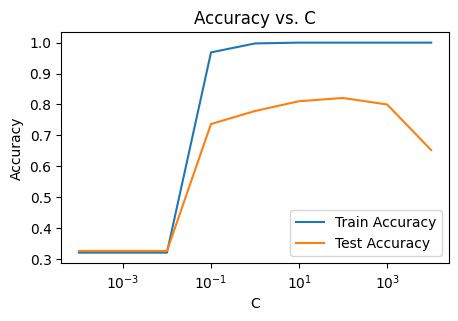

In [9]:
#[코드 6-11] 모델링 결과 시각화 코드
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(param_grid, train_result, label='Train Accuracy')
plt.plot(param_grid, test_result, label='Test Accuracy')
plt.xscale('log')  # x 축을 로그 스케일로 설정
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C')
plt.legend()
plt.show()

In [10]:
#코드 6-12] 최종 데이터 학습 및 결과 저장 코드
import joblib
lr = LogisticRegression(penalty = 'l1', C = 100, solver='liblinear')
lr.fit(X_train, Y_train)

column_names = X.columns
df1 = pd.DataFrame(column_names)
df1["value"] = lr.coef_[0]
df1.to_excel("coef_result.xlsx")

joblib.dump(quantify, 'transaction_encoder.pkl')
joblib.dump(scaler, 'StandardScaler.pkl')
joblib.dump(lr, 'Sentiment_Analysis.pkl')

['Sentiment_Analysis.pkl']

In [11]:
#[코드 6-13] 텍스트 분류을 위한 전체 데이터 정형화 코드
import joblib


loaded_quantify = joblib.load('transaction_encoder.pkl')
filtered_new_texts_ko = [[item for item in transaction if item in loaded_quantify.columns_] for transaction in total_texts_ko]
new_te_ary = loaded_quantify.transform(filtered_new_texts_ko)
new_te_ary_int = new_te_ary.astype(int)
new_df = pd.DataFrame(new_te_ary_int, columns=loaded_quantify.columns_)
new_df

,가격,가구,가기,가까이,가끔,가나,가능,가도,가드,가르다,...,활동,회관,회원,회현역,효과,후기,휴무,휴식,휴일,힐링
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3160,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3162,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#[코드 6-14] 전체데이터 표준화와 모델링 적용
scaler = joblib.load('StandardScaler.pkl')
loaded_model = joblib.load('Sentiment_Analysis.pkl')
X_scaled = scaler.transform(new_df)
predictions = loaded_model.predict(X_scaled)
probabilities = loaded_model.predict_proba(X_scaled)

apply_result = pd.DataFrame(probabilities)
apply_result["분류"] = predictions
apply_result["텍스트"] = data_apply["리뷰"]
apply_result.to_excel("apply_result.xlsx")
apply_result

,0,1,분류,텍스트
0,0.992762,7.238367e-03,0,다음날이 휴일이라 그래도 주차가 수월 했어요~\n주차장만 좀 확장되면 좋겠어요~~\...
1,0.925473,7.452721e-02,0,월수금 파워아쿠아로빅을 다녀요~\n강사님 너무 열심히 해주시고 너무 즐거운 시간이예...
2,0.070079,9.299214e-01,1,아쿠아로빅 만1년 했어요~\n강사님 넘 열심히시고 건강해지고 있어요~\n시설도 점점...
3,0.500122,4.998776e-01,0,자유수영 3처넌 수영강습 49500원. 자유수영좀 늘려줬음 좋겠다 강습 하려면 새...
4,0.027916,9.720837e-01,1,처음방문해봤는데 깔끔하게잘되어있네요 거리만좀가까웠으면자주올수있을텐데 아쉽네요시설이 ...
...,...,...,...,...
3159,0.003425,9.965751e-01,1,수영- 수영선생님은 한 분....언제까지???\n물은 다시 똥물... 앞이 안 보임
3160,1.000000,1.483910e-07,0,들어가기 힘들어 기존회원 접수를 놓치면\n정말 자신을 자책하기 쉽다\n그만큼 인기가 많다
3161,0.000172,9.998280e-01,1,스크린골프연습하는 스포츠시설\n주차장도 넓고 저렴한금액으로 좋은시설이용하니 너무 좋아요
3162,0.000638,9.993616e-01,1,필라테스 수업 너무 좋아요 퀄리티 높은 수업을 저렴한 가격에 받는 건 행운입니다^^


#공공체육시설 부정 리뷰의 토픽모델링


In [13]:
#[코드 6-15] 부정 리뷰 데이터 불러오기
import pandas as pd

apply_result = pd.read_excel("apply_result.xlsx")
contents  = apply_result.groupby("분류").get_group(0)["텍스트"]
contents

,텍스트
0,다음날이 휴일이라 그래도 주차가 수월 했어요~\n주차장만 좀 확장되면 좋겠어요~~\...
1,월수금 파워아쿠아로빅을 다녀요~\n강사님 너무 열심히 해주시고 너무 즐거운 시간이예...
3,자유수영 3처넌 수영강습 49500원. 자유수영좀 늘려줬음 좋겠다 강습 하려면 새...
6,처음엔 물위라 흔들흔들 어지러웠지만 점점 괜찮아졌어요\n보드를 전부 묶어나서 다른사...
9,주차가 안돼서 차량을 두고 조금 걸어서 올라가야 하지만 숲이 좋아 걷기에도 좋고 시...
...,...
3150,수업 신청은 어렵다
3153,기존회원이 계속 하다보니 신규회원이 들어가기 힘들어요.
3157,여전히 주차하기는 힘드네요..
3160,들어가기 힘들어 기존회원 접수를 놓치면\n정말 자신을 자책하기 쉽다\n그만큼 인기가 많다


In [105]:
#[코드 6-16] 데이터 전처리 (명사추출, 불용어처리, 텍스트정규화)
from konlpy.tag import Okt
t = Okt()
stopword = ['등등','아주','리뷰','위해','무엇','동안','실만','이후','다시','때문','여기','다만','좀','더','수','곳','분','때','안','것','함','구','요','애','해','굿','풀','달']
pos = lambda d: ['/'.join(p[:-1]) for p in t.pos(d, stem=True, norm=True) if ((p[1]=='Noun'))& (p[0] not in stopword)]

texts_ko = []
for doc in contents:
  a = pos(doc)
  filtered_list = ["주차장" if x == "주차공간" else "선생님" if x == "쌤" else"물" if x == "물이" else  "어린이" if x == "아이" else x for x in a]
  texts_ko.append(filtered_list)
texts_ko

[['다음', '날', '휴일', '주차', '월', '주차장', '확장', '진짜', '운동'],
 ['월', '수금', '파워', '아쿠아', '로빅', '강사', '해주시', '시간', '주차장', '확장'],
 ['자유', '수영', '처넌', '수영', '강습', '자유', '수영', '강습', '새벽', '오픈', '런', '가능'],
 ['처음', '물위', '점점', '보드', '전부', '다른사람', '거'],
 ['주차', '차량', '조금', '숲', '걷기', '시설', '배드민턴'],
 ['물', '주차장', '협소하', '도로', '옆', '주차', '바로', '딱지', '매일', '고지서'],
 ['강사', '시설', '화장실', '탈의실', '바닥', '물', '이', '흥건', '그게'],
 ['훌쩍', '건강', '한가지', '사람'],
 ['똥',
  '수영장',
  '일주일',
  '청소',
  '물',
  '갈고',
  '상급',
  '레인',
  '강사',
  '자유',
  '수영',
  '중',
  '지속',
  '듯'],
 ['등록', '오전', '오후', '프로', '성향'],
 ['드뎌', '저', '수영', '꿈', '나무', '물', '호흡', '고민', '물', '먹음'],
 ['완전', '만족', '샤워', '드라이기', '힘', '청소', '아주머니', '움직', '탈의실', '물바다'],
 ['주차장', '조금', '첫', '무료', '계산'],
 ['이전다음', '만', '방문', '사람', '제법', '가이드', '일', '냉온', '탕', '운영'],
 ['재키', '스피닝', '신나요', '나이', '점점', '재', '키스', '피닝', '금', '나래'],
 ['처음', '스트레칭', '등록', '요가', '수업', '필레', '테스', '소도구', '개인'],
 ['센터',
  '카페',
  '운동',
  '자주',
  '이용',
  '요즘',
  '핫도그',
  '생기',
  '베이글',


In [106]:
#[코드 6-17] 데이터 전처리 (복합명사 정규화)
import gensim

bigram = gensim.models.Phrases(texts_ko, min_count=5)  #최소카운트 설정
bigram_mod = gensim.models.phrases.Phraser(bigram)
compound_noun = [bigram_mod[text] for text in texts_ko]
texts_ko = [[word.replace('_', '') for word in row] for row in compound_noun]
texts_ko

[['다음', '날', '휴일', '주차', '월', '주차장', '확장', '진짜', '운동'],
 ['월수금', '파워', '아쿠아', '로빅', '강사', '해주시', '시간', '주차장', '확장'],
 ['자유수영', '처넌', '수영', '강습', '자유수영', '강습', '새벽', '오픈', '런', '가능'],
 ['처음', '물위', '점점', '보드', '전부', '다른사람', '거'],
 ['주차', '차량', '조금', '숲', '걷기', '시설', '배드민턴'],
 ['물', '주차장', '협소하', '도로', '옆', '주차', '바로', '딱지', '매일', '고지서'],
 ['강사', '시설', '화장실', '탈의실', '바닥', '물', '이', '흥건', '그게'],
 ['훌쩍', '건강', '한가지', '사람'],
 ['똥',
  '수영장',
  '일주일',
  '청소',
  '물',
  '갈고',
  '상급',
  '레인',
  '강사',
  '자유수영',
  '중',
  '지속',
  '듯'],
 ['등록', '오전', '오후', '프로', '성향'],
 ['드뎌', '저', '수영', '꿈', '나무', '물', '호흡', '고민', '물', '먹음'],
 ['완전', '만족', '샤워', '드라이기', '힘', '청소', '아주머니', '움직', '탈의실', '물바다'],
 ['주차장', '조금', '첫', '무료', '계산'],
 ['이전다음', '만', '방문', '사람', '제법', '가이드', '일', '냉온', '탕', '운영'],
 ['재키', '스피닝', '신나요', '나이', '점점', '재', '키스', '피닝', '금', '나래'],
 ['처음', '스트레칭', '등록', '요가', '수업', '필레', '테스', '소도구', '개인'],
 ['센터',
  '카페',
  '운동',
  '자주',
  '이용',
  '요즘',
  '핫도그',
  '생기',
  '베이글',
  '생기',
  '여',
  '

In [95]:
#[코드 6-18] 텍스트 정형화 코드
import nltk
from gensim import corpora, models

word = [text for texts in texts_ko for text in texts] #하나의 리스트에 넣기##
text = nltk.Text(word)
print(len(text.tokens)) # 문서에서 나온 단어수
print(len(set(text.tokens))) # 겹치지 않는 단어수
print(text.vocab().most_common(20)) # 가장 빈번히 나온 token 나열
df = pd.DataFrame()
keys, values = zip(*[(key, value) for key, value in text.vocab().items()])
df["단어"] = keys
df["빈도수"] = values
df.to_excel("TF_na.xlsx")

dictionary_ko = corpora.Dictionary(texts_ko)
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]  #tf방법으로 데이터 정형화한 코드
tfidf_model = models.TfidfModel(tf_ko)
tfidf_corpus = tfidf_model[tf_ko]  #tf-idf방법으로 데이터 정형화한 코드
tfidf_list = []
for doc in tfidf_corpus:
  tfidf_dict = {dictionary_ko[word_id]: tfidf_value for word_id, tfidf_value in doc}
  tfidf_list.append(tfidf_dict)

df = pd.DataFrame(tfidf_list)
key, value = zip(*[(a, round(df[a].sum(), 5)) for a in df.columns.tolist()])
df = pd.DataFrame()
df["단어"] = key
df["tf-idf"] = value
df.to_excel('tfidf_na.xlsx', index=False)

5674
1689
[('수영', 148), ('이용', 92), ('사람', 90), ('주차', 88), ('수영장', 85), ('자유수영', 84), ('물', 83), ('주차장', 78), ('어린이', 58), ('강사', 56), ('시간', 50), ('수업', 49), ('시설', 46), ('등록', 45), ('주말', 40), ('레인', 39), ('관리', 39), ('프로그램', 39), ('선생님', 37), ('코로나', 34)]


!!!!!!!!!!!2실행중입니다!!!!!!!!!!!
!!!!!!!!!!!3실행중입니다!!!!!!!!!!!
!!!!!!!!!!!4실행중입니다!!!!!!!!!!!
!!!!!!!!!!!5실행중입니다!!!!!!!!!!!
!!!!!!!!!!!6실행중입니다!!!!!!!!!!!
!!!!!!!!!!!7실행중입니다!!!!!!!!!!!
!!!!!!!!!!!8실행중입니다!!!!!!!!!!!
!!!!!!!!!!!9실행중입니다!!!!!!!!!!!
!!!!!!!!!!!10실행중입니다!!!!!!!!!!!
!!!!!!!!!!!11실행중입니다!!!!!!!!!!!
!!!!!!!!!!!12실행중입니다!!!!!!!!!!!
!!!!!!!!!!!13실행중입니다!!!!!!!!!!!
!!!!!!!!!!!14실행중입니다!!!!!!!!!!!
!!!!!!!!!!!15실행중입니다!!!!!!!!!!!


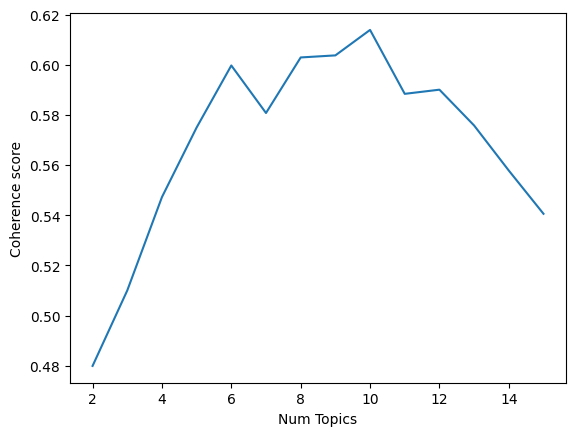

Num Topics = 2  has Coherence Value of 0.4799
Num Topics = 3  has Coherence Value of 0.51
Num Topics = 4  has Coherence Value of 0.5473
Num Topics = 5  has Coherence Value of 0.575
Num Topics = 6  has Coherence Value of 0.5998
Num Topics = 7  has Coherence Value of 0.5808
Num Topics = 8  has Coherence Value of 0.603
Num Topics = 9  has Coherence Value of 0.6038
Num Topics = 10  has Coherence Value of 0.614
Num Topics = 11  has Coherence Value of 0.5885
Num Topics = 12  has Coherence Value of 0.5901
Num Topics = 13  has Coherence Value of 0.5758
Num Topics = 14  has Coherence Value of 0.5579
Num Topics = 15  has Coherence Value of 0.5406


In [102]:
#[코드 6-19] Coherence Index 산출코드
from gensim.models import CoherenceModel
import gensim
import matplotlib.pyplot as plt

start = 2
limit = 15
step = 1

coherence_values = []
for num_topic in range(start, limit+1, step):
  print("!!!!!!!!!!!"+str(num_topic)+"실행중입니다!!!!!!!!!!!")
  lda_model = gensim.models.ldamodel.LdaModel(corpus=tf_ko, id2word=dictionary_ko,
                    num_topics=num_topic, random_state=100,update_every=1, chunksize=100,
                    passes=10, alpha='auto', per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_ko,
                             dictionary=dictionary_ko, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

x = range(start, limit+1, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [104]:
#[코드 6-20] 토픽모델링 결과산출 코드
from gensim import models
from pprint import pprint

topic_num = 6  #토픽수 설정
nwords = 10 # 단어수 설정

lda_model = gensim.models.ldamodel.LdaModel(corpus=tf_ko, id2word=dictionary_ko,
               num_topics = topic_num, random_state=100, update_every=1,
               chunksize=100, passes=10,alpha='auto', per_word_topics=True)
pprint(lda_model.print_topics(num_words=nwords))

[(0,
  '0.086*"주차" + 0.061*"주차장" + 0.031*"직원" + 0.028*"시설" + 0.026*"시간" + '
  '0.022*"이용" + 0.018*"주말" + 0.017*"수심" + 0.015*"가격" + 0.013*"샤워"'),
 (1,
  '0.051*"강사" + 0.027*"자주" + 0.023*"운동" + 0.023*"탈의실" + 0.015*"문제" + '
  '0.014*"수업" + 0.013*"동네" + 0.013*"수질" + 0.013*"구민" + 0.013*"환불"'),
 (2,
  '0.039*"어린이" + 0.036*"접수" + 0.034*"수업" + 0.032*"관리" + 0.030*"회원" + '
  '0.029*"등록" + 0.019*"신청" + 0.018*"신규" + 0.017*"다른" + 0.016*"조금"'),
 (3,
  '0.055*"이용" + 0.051*"수영장" + 0.028*"규모" + 0.022*"선생님" + 0.019*"주말" + '
  '0.018*"자리" + 0.017*"할인" + 0.015*"남자" + 0.013*"센터" + 0.013*"데스크"'),
 (4,
  '0.073*"사람" + 0.035*"물" + 0.029*"프로그램" + 0.024*"별로" + 0.023*"운영" + '
  '0.020*"자유수영" + 0.019*"정말" + 0.016*"코로나" + 0.016*"카운터" + 0.014*"집"'),
 (5,
  '0.079*"수영" + 0.046*"물" + 0.040*"자유수영" + 0.036*"레인" + 0.023*"수영장" + '
  '0.021*"요즘" + 0.019*"저녁" + 0.015*"할머니" + 0.015*"표정" + 0.014*"냄새"')]


In [125]:
#[코드 6-21] 토픽모델링 세부결과산출 코드
df = pd.DataFrame(0, index=range(len(apply_result.groupby("분류").get_group(0))), columns=range(topic_num+1))
n=["리뷰"]
for a in range(1, topic_num+1):
  n.append("토픽"+str(a))
df.columns = n
row_index = 0  # Row index
col_index = 0  # Column index
for a in apply_result.groupby("분류").get_group(0)['텍스트'].reset_index(drop=True):
  df.iloc[row_index, col_index] = a
  row_index += 1

row_index = 0
for topic_list in enumerate(lda_model[tf_ko]):
  col_index = 1
  for c in topic_list[1][0]:
    df.iloc[row_index, c[0]+1] = c[1]
    col_index += 1
  row_index += 1
total_sum = 0
for a in range(len(df)):
  sum = df.drop(['리뷰'],axis = 1).loc[a].sum()
  total_sum = total_sum+sum
for a in df.drop(['리뷰'],axis = 1). columns:
  cnt = round(df[a].sum()/total_sum,4)*100
  print(a+"의 비율은 : "  + str(cnt))
df.to_excel("topic_result.xlsx")

<ipython-input-125-7d8914693806>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '다음날이 휴일이라 그래도 주차가 수월 했어요~
주차장만 좀 확장되면 좋겠어요~~
그럼 진짜 운동하러 가는게 행복할것 같아요~' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[row_index, col_index] = a
<ipython-input-125-7d8914693806>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.38895902037620544' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[row_index, c[0]+1] = c[1]
<ipython-input-125-7d8914693806>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.11511857807636261' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[row_index, c[0]+1] = c[1]
<ipython-input-125-7d8914693806>:17: FutureWarning: S

토픽1의 비율은 : 17.45
토픽2의 비율은 : 13.020000000000001
토픽3의 비율은 : 17.7
토픽4의 비율은 : 17.23
토픽5의 비율은 : 17.48
토픽6의 비율은 : 17.119999999999997
